In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

db = psycopg2.connect(
    dbname='ecommerce',
    host='localhost',
    user='postgres',
    password='583946@Rakib',
    port="5432" 
)
# Enable autocommit so simple read queries won't fail due to prior errors
db.autocommit = True

cur = db.cursor()
# Ensure any prior aborted transaction is cleare
try:
    db.rollback()
except Exception:
    pass

# List all unique cities where customers are located.

In [15]:
query = """select customer_city from customers"""
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('sao paulo',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('sao paulo',),
 ('caxias do sul',),
 ('piracicaba',),
 ('rio de janeiro',),
 ('guarulhos',),
 ('sao paulo',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('sao paulo',),
 ('curitiba',),
 ('sao paulo',),
 ('santo andre',),
 ('goiania',),
 ('sao paulo',),
 ('cachoeiro de itapemirim',),
 ('sao paulo',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('curitiba',),
 ('sumare',),
 ('guarulhos',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('guarulhos',),
 ('santa barbara',),
 ('sao paulo',),
 ('guarulhos',),
 ('ribeirao preto',),
 ('belo horizonte',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('jaragua do sul',),
 ('sao paulo',),
 ('montes claros',),
 ('

# 2. Count the number of orders placed in 2017.

In [16]:
query = """
SELECT count(customer_id)
FROM orders
WHERE order_purchase_timestamp >='2017-01-01' 
    AND order_purchase_timestamp< '2018-01-01'
"""
cur.execute(query)
data = cur.fetchall()
"Total order place in 2017 are",data[0][0]

('Total order place in 2017 are', 45101)

# 3. Find the total sales per category.

In [17]:
query = """
SELECT
    INITCAP(p.product_category)  AS category,
    round(sum(pmt.payment_value))  AS total_sells
FROM products p
 JOIN order_items o ON p.product_id = o.product_id
 JOIN payments pmt ON pmt.order_id = o.order_id
GROUP BY product_category
ORDER BY total_sells DESC
"""
cur.execute(query)
data = cur.fetchall()

df= pd.DataFrame(data, columns=['catagory', 'total_sales'])
df

,catagory,total_sales
0,Bed Table Bath,1712554.0
1,Health Beauty,1657373.0
2,Computer Accessories,1585330.0
3,Furniture Decoration,1430176.0
4,Watches Present,1429217.0
...,...,...
69,Pc Gamer,2174.0
70,House Comfort 2,1711.0
71,Cds Music Dvds,1199.0
72,Fashion Children'S Clothing,786.0


# 4. Calculate the percentage of orders that were paid in installments.

In [18]:
query = """
SELECT
   SUM(CASE WHEN payment_installments >=1 THEN 1 ELSE 0 END)*100/COUNT(*) AS percentage_payment
FROM payments
"""
cur.execute(query)
data = cur.fetchall()
"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is', 99)

# 5. Count the number of customers from each state.

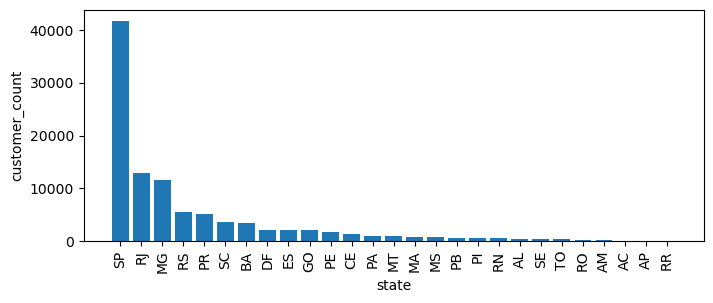

In [19]:
query = """
   SELECT
      customer_state,
      COUNT(customer_id) AS customers
FROM customers
GROUP BY customer_state
ORDER BY customers DESC
"""
cur.execute(query)
data = cur.fetchall()
plt.figure(figsize=(8,3))
df = pd.DataFrame(data, columns= ['state', 'customer_count'])
plt.bar(df['state'], df['customer_count'])
plt.xticks(rotation = 90)
plt.xlabel('state')
plt.ylabel('customer_count')
plt.show()


#  6. Calculate the number of orders per month in 2018.

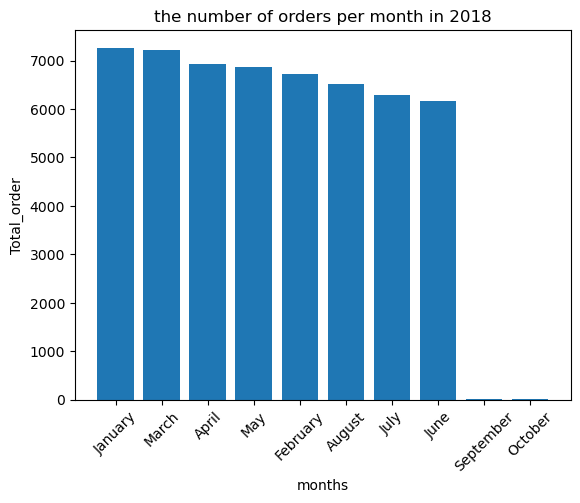

In [20]:
query = """
   SELECT
    to_char(order_purchase_timestamp::DATE, 'FMMonth') AS months,
    COUNT(order_id) AS total_order
FROM orders
WHERE order_purchase_timestamp >= '2018-01-01' and order_purchase_timestamp < '2019-01-01'
GROUP BY months
ORDER BY total_order DESC
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['months', 'total_order'])
plt.bar(df['months'], df['total_order'])
plt.xlabel('months')
plt.ylabel('Total_order')
plt.xticks(rotation = 45)
plt.title('the number of orders per month in 2018')
plt.show()

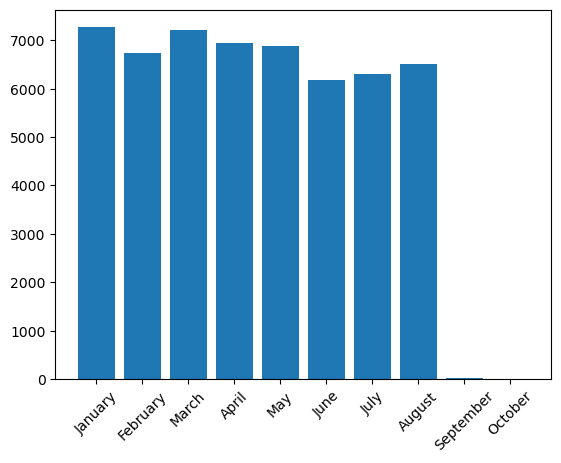

In [21]:
query = """
   SELECT
    EXTRACT(MONTH FROM order_purchase_timestamp::DATE) AS order_month,
    COUNT(order_id) AS total_order
FROM orders
WHERE order_purchase_timestamp >= '2018-01-01' and order_purchase_timestamp < '2019-01-01'
GROUP BY order_month
ORDER BY order_month 
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['order_month', 'total_order'])
df['order_month'] = df['order_month'].astype(int)
df['order_month'] = pd.to_datetime(df['order_month'], format='%m').dt.month_name()
plt.bar(df['order_month'], df['total_order'])
plt.xticks(rotation = 45)
plt.show()

# 7. Find the average number of products per order, grouped by customer city.

In [22]:
query = """
   WITH count_per_order AS (
    SELECT
        o.order_id,
        o.customer_id,
        COUNT(oi.order_id) AS order_count
    FROM orders o
    LEFT JOIN order_items oi ON o.order_id = oi.order_id
    GROUP BY o.order_id, o.customer_id
)
SELECT
    c.customer_city,
    ROUND(AVG(cpo.order_count),2) AS avg_order_count
FROM customers c
JOIN count_per_order cpo ON c.customer_id = cpo.customer_id
GROUP BY c.customer_city;

"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['customer_city', 'avg_product_order'])
df = df.sort_values(by= 'avg_product_order', ascending= False)
df

,customer_city,avg_product_order
279,padre carvalho,7.00
3984,celso ramos,6.50
1197,datas,6.00
3806,candido godoi,6.00
1605,matias olimpio,5.00
...,...,...
3800,caetanos,0.00
3979,alto bela vista,0.00
3060,palmital de minas,0.00
2121,sao domingos do sul,0.00


# 8. Calculate the percentage of total revenue contributed by each product category.

In [23]:
query = """
  SELECT
   p.product_category,
    ROUND(
        (SUM(pmt.payment_value)::numeric) / SUM(SUM(pmt.payment_value)) OVER ()::numeric * 100,
        2
    ) AS percentage_of_total

from products p
LEFT JOIN order_items oi ON p.product_id = oi.product_id
LEFT JOIN payments pmt ON oi.order_id = pmt.order_id
GROUP BY p.product_category
ORDER BY percentage_of_total DESC
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=[ 'catagory','percentage_of_total'])
df

,catagory,percentage_of_total
0,bed table bath,8.43
1,HEALTH BEAUTY,8.16
2,computer accessories,7.81
3,Watches present,7.04
4,Furniture Decoration,7.04
...,...,...
69,La Cuisine,0.01
70,cds music dvds,0.01
71,flowers,0.01
72,insurance and services,0.00


# 9. Identify the correlation between product price and the number of times a product has been purchased.

In [24]:
query = """
  SELECT 
    p.product_category,
    count(p.product_id),
    ROUND(AVG(oi.price))
FROM products p
LEFT JOIN order_items oi ON p.product_id = oi.product_id
GROUP BY p.product_category
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['product_catagory', 'order_count', 'product_price'])
corrrelation =df.corr(numeric_only=True)
print('Correlation between price and total purchases: ',corrrelation)

Correlation between price and total purchases:                 order_count  product_price
order_count        1.00000       -0.10644
product_price     -0.10644        1.00000


# 10. Calculate the total revenue generated by each seller, and rank them by revenue.

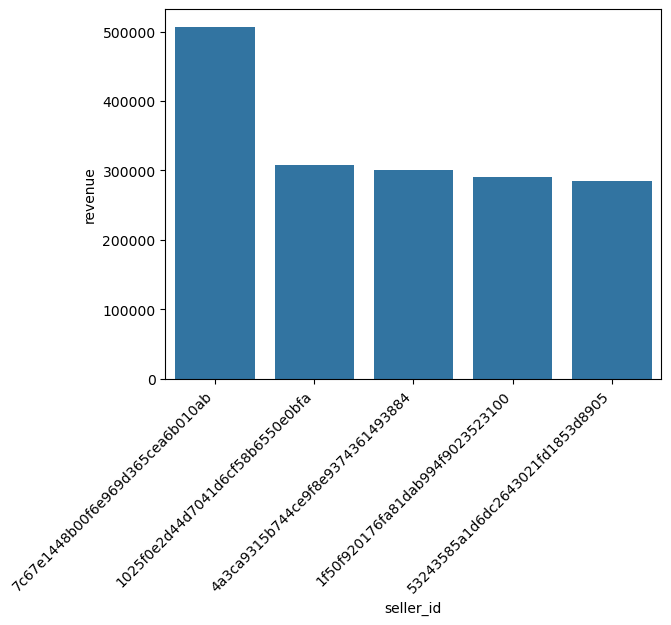

In [25]:
query = """
  SELECT 
*, 
 DENSE_RANK() OVER(ORDER BY revenue DESC) AS rank_num
FROM (SELECT 
    oi.seller_id,
    round(sum(pmt.payment_value)) AS revenue
FROM order_items oi
LEFT JOIN payments pmt ON oi.order_id = pmt.order_id
GROUP BY oi.seller_id) 
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['seller_id', 'revenue', 'rank_num'])
df = df.head()

sns.barplot(x='seller_id', y='revenue', data= df)
plt.xticks(rotation = 45, ha='right')
plt.show()

# 11. Calculate the moving average of order values for each customer over their order history.

In [26]:
query = """
  WITH order_values AS (
    SELECT 
    o.customer_id,
    o.order_purchase_timestamp,
    pmt.payment_value
FROM orders o
LEFT JOIN payments pmt ON o.order_id = pmt.order_id)

SELECT 
    customer_id,
    order_purchase_timestamp,
    payment_value,
    AVG(payment_value) OVER(
        PARTITION BY customer_id ORDER BY order_purchase_timestamp 
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) mov_avg
FROM order_values

"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['customer_id', 'order_purchase_timestamp', 'payment_value', 'mov_avg'])
df

,customer_id,order_purchase_timestamp,payment_value,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
...,...,...,...,...
103882,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,9.49,27.12
103883,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.13
103884,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.13
103885,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.50


# Calculate the cumulative sales per month for each year.

In [27]:
query = """
  WITH monthly_seles AS(SELECT 
    EXTRACT(YEAR FROM o.order_purchase_timestamp::date) AS years,
    TO_CHAR(o.order_purchase_timestamp::date, 'FMMonth' ) AS months,
    ROUND(SUM(pmt.payment_value)) AS monthly_revenue
FROM orders o
LEFT JOIN payments pmt ON o.order_id = pmt.order_id
GROUP BY years , months
ORDER BY years, months)


SELECT 
    years, months, monthly_revenue,
    SUM(monthly_revenue) over(ORDER BY years, months) AS cumulative_seles
FROM monthly_seles

"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['years', 'months', 'monthly_revenue', 'cumulative_seles'])
df


,years,months,monthly_revenue,cumulative_seles
0,2016,December,20.0,20.0
1,2016,October,59090.0,59110.0
2,2016,September,252.0,59362.0
3,2017,April,417788.0,477150.0
4,2017,August,674396.0,1151546.0
5,2017,December,878401.0,2029947.0
6,2017,February,291908.0,2321855.0
7,2017,January,138488.0,2460343.0
8,2017,July,592383.0,3052726.0
9,2017,June,511276.0,3564002.0


# 13. Calculate the year-over-year growth rate of total sales.

In [ ]:
query = """
    SELECT 
        years,
        ROUND(((revenue - LAG(revenue, 1) OVER(ORDER BY years))/
        LAG(revenue, 1) OVER(ORDER BY years))*100) AS yoy_grourh_rate
    FROM (
    SELECT 
    EXTRACT(YEAR FROM o.order_purchase_timestamp::date) AS years,
    ROUND(SUM(pmt.payment_value)) AS revenue
FROM orders o
LEFT JOIN payments pmt ON o.order_id = pmt.order_id
GROUP BY years 
ORDER BY years) AS yearly_sales
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['years', 'yoy%grourh'])
df

,years,yoy%grourh
0,2016,NaN
1,2017,12113.0
2,2018,20.0


# 14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [43]:
query = """
    WITH a AS (
    SELECT 
        c.customer_id,
        MIN(o.order_purchase_timestamp::timestamp) AS first_order
    FROM customers c
    LEFT JOIN orders o 
        ON c.customer_id = o.customer_id
    GROUP BY c.customer_id
),

b AS(
    SELECT 
    a.customer_id,
    COUNT(DISTINCT o.order_purchase_timestamp::timestamp) AS repeat_purchases
FROM a
LEFT JOIN orders o 
    ON a.customer_id = o.customer_id
   AND o.order_purchase_timestamp::timestamp > a.first_order
   AND o.order_purchase_timestamp::timestamp < a.first_order + INTERVAL '6 months'
GROUP BY a.customer_id
)

SELECT 
    100*(COUNT(DISTINCT a.customer_id) / COUNT(DISTINCT b.customer_id)) 
FROM a  
LEFT JOIN b ON a.customer_id = b.customer_id 
"""

cur.execute(query)
data = cur.fetchall()
data[0][0]

100

# 15. Identify the top 3 customers who spent the most money in each year.

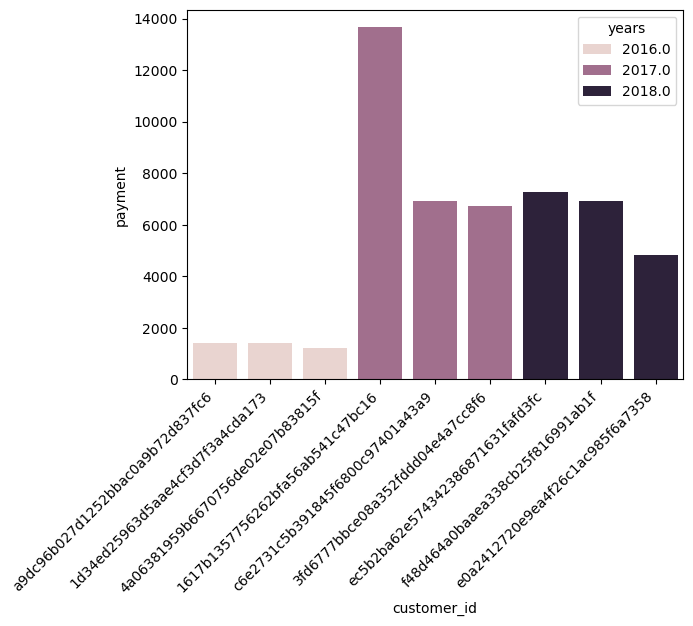

In [ ]:
query = """
WITH sales_row AS(
    SELECT
        EXTRACT(YEAR FROM o.order_purchase_timestamp::date) AS years,
        o.customer_id,
        SUM(pmt.payment_value) AS payments,
        DENSE_RANK() OVER(PARTITION BY EXTRACT(YEAR FROM o.order_purchase_timestamp::date) 
        ORDER BY SUM(pmt.payment_value) DESC) AS d_rank
    FROM orders o
    LEFT JOIN payments pmt ON o.order_id = pmt.order_id
    GROUP BY o.customer_id, years
    HAVING SUM(pmt.payment_value) > 0
)

SELECT 
years, customer_id, payments 
FROM sales_row
WHERE d_rank <=3
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['years', 'customer_id', 'payment'])
sns.barplot(x='customer_id', y='payment', data= df, hue='years' )
plt.xticks(rotation=45, ha='right')
plt.show()

In [52]:
df 

,years,customer_id,payment
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74
2,2016,4a06381959b6670756de02e07b83815f,1227.78
3,2017,1617b1357756262bfa56ab541c47bc16,13664.08
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.31
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.88
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.21
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.44
